# ***CASE BASE 1 PEMBELAJARAN MESIN***
NAJIB JAMIL ABDURRAHMAN 

1301204250

**Import Library**

In [251]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Data Description**

This database contains 279 attributes, 206 of which are linear valued and the rest are nominal.

Concerning the study of H. Altay Guvenir: "The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones. For the time being, there exists a computer program that makes such a classification. However there are differences between the cardiolog's and the programs classification. Taking the cardiolog's as a gold standard we aim to minimise this difference by means of machine learning tools."

The names and id numbers of the patients were recently removed from the database.

**Mengimport File**

In [252]:
from google.colab import files
uploadFile = files.upload()

Saving arrhythmia.data to arrhythmia (5).data


**Membaca Data Set dari File**

In [253]:
dataSet = '/content/arrhythmia.data'
setdata = pd.read_csv(dataSet, delimiter=",", header = None)
setdata

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


**Menyederhanakan Kolom**

In [254]:
index = 0

for value in setdata[279]:
  if value == 1:
    setdata[279][index] = 0
  elif value > 0 and value < 10:
    setdata[279][index] = 1
  else :
    setdata[279][index] = 2
  index += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**Menampilkan Hasil Data yang Telah Disederhanakan**

- 0 = Normal ECG
- 1 = Different Class
- 2 = Unclassified

In [255]:
print(setdata.shape)
setdata

(452, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,2
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,0
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,0
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,2
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,1
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,0


# **Data Exploration (Preprocessing)**

In [256]:
setdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [257]:
setdata.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,0.637168
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,0.768700
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,0.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,0.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,0.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,1.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,2.000000


**Mengecek apakah ada nilai 0**

In [258]:
setdata.isnull().values.any()

False

In [259]:
setdata.head

<bound method NDFrame.head of      0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275  2

**Drop Kolom Nilai Null**

In [260]:
df1 = setdata.dropna()
print(df1)

     0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275  276   277   278  279  
0    0.0

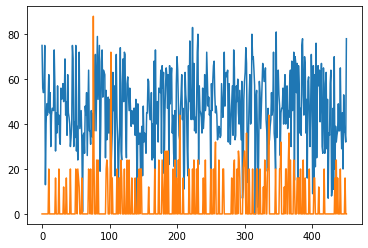

In [261]:
dataset = df1.iloc[:, [0,15]].values
plt.plot(dataset)
plt.show()

**Reshape Data**

In [262]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype('float32')
dataset.shape

(904, 1)

**Scalling Data**

In [263]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

# **Train Data**

**Train Test Data**

In [264]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)- train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))

train size: 452, test size: 452


**Split Data**

In [265]:
data_x = []
data_y = []
timestemp = 10

for i in range(len(train)- timestemp -1):
    a = train[i:(i+timestemp), 0]
    data_x.append(a)
    data_y.append(train[i + timestemp, 0])

    
x_train, y_train = np.array(data_x), np.array(data_y)

In [266]:
data_x = []
data_y = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    data_x.append(a)
    data_y.append(test[i + timestemp, 0])

    
x_test, y_test = np.array(data_x), np.array(data_y)

In [267]:
x_train.shape

(441, 10)

In [268]:
x_train = np.reshape(x_train, (x_train.shape[0],1,  x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,  x_test.shape[1]))

In [269]:
x_train.shape

(441, 1, 10)

# **Create LSTM Model**

**Creating Model**

In [270]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestemp)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
441/441 [==============================] - 3s 2ms/step - loss: 0.0428
Epoch 2/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0278
Epoch 3/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0273
Epoch 4/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0271
Epoch 5/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0268
Epoch 6/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0267
Epoch 7/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0269
Epoch 8/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0264
Epoch 9/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0261
Epoch 10/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0262
Epoch 11/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0261
Epoch 12/100
441/441 [==============================] - 1s 2ms/step - loss: 0.0262
Epoch 13/100


**Prediksi Data**

In [271]:
# Buat Predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# RMSE
trainScore = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

14/14 [==============================] - 0s 2ms/step
Train Score: 13.31 RMSE
Test Score: 14.28 RMSE


**Membandingkan Hasil Prediksi dengan Aslinya**

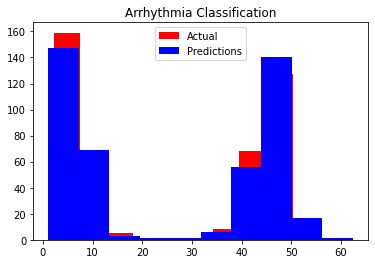

In [272]:
plt.hist(test_predict, color = 'red', label = 'Actual')
plt.hist(train_predict, color='blue', label='Predictions')
plt.title('Arrhythmia Classification')
plt.legend()
plt.show()